Text(0.5, 1.0, 'Ordenados aleatoriamente')

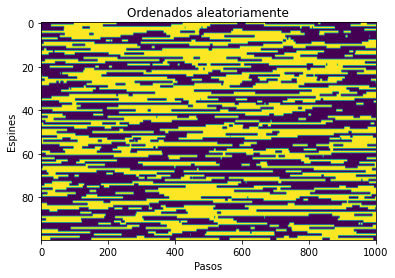

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt

#parámetros iniciales
nEspines=100
J=1
nPasos=1000
temperatura=10.0

#inicializar el arreglo de espines
arregloEsp=np.random.rand(nEspines)

#se asigna la orientación
for i in range (nEspines):
    if arregloEsp[i]<=0.5:
        arregloEsp[i]=-0.5
    else:
        arregloEsp[i]=0.5

#se calcula la energía
def CalcEnergia(arregloEsp):
    enerSist=0
    for i in range(nEspines-1):
        enerSist+=arregloEsp[i]*arregloEsp[i+1]
    return enerSist*(-J)


#se selecciona un espín a cambiar y se vuelve a calcular la energía del nuevo sistema
def EnergiaNuevoSistema(arregloEsp):
    espinCambio=random.randint(0,nEspines-1)
    arregloNuevo=np.copy(arregloEsp)
    arregloNuevo[espinCambio]=-1*arregloEsp[espinCambio]
    
    energiaNuevoSistema=CalcEnergia(arregloNuevo)
    
    return energiaNuevoSistema, arregloNuevo 

#se usa metrópolis
def Trans(enerSist,energiaNuevoSistema,temperatura):
    if energiaNuevoSistema <= enerSist:
        return True
    elif energiaNuevoSistema > enerSist:
        probabilidad = np.exp(-(energiaNuevoSistema-enerSist)/temperatura)
        umbral = np.random.random()
        if umbral < probabilidad:
            return True
        else:
            return False
        

def Ejecutar(arregloEsp,nPasos):
    arregloGeneral = np.zeros(shape=(nPasos+1,nEspines))
    arregloGeneral[0,:]= arregloEsp
    for i in range(nPasos):
        enerSist = CalcEnergia(arregloGeneral[i,:])
        energiaNuevoSistema, arregloNuevo = EnergiaNuevoSistema(arregloGeneral[i,:])
        
        if Trans(enerSist,energiaNuevoSistema,temperatura) == True:
            arregloGeneral[i+1,:] = arregloNuevo
        else:
            arregloGeneral[i+1,:] = arregloGeneral[i,:]
    return arregloGeneral

plt.imshow(np.transpose(Ejecutar(arregloEsp,nPasos)),aspect = "auto")

plt.xlabel("Pasos")
plt.ylabel("Espines")
plt.title("Ordenados aleatoriamente")


        

Text(0.5, 1.0, 'Ordenados hacia abajo')

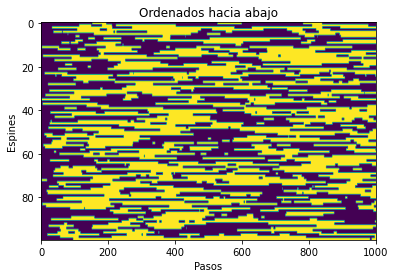

In [20]:
arregloEspAbajo = np.random.rand(nEspines)
for i in range (nEspines):
    arregloEspAbajo[i] = -0.5
    
plt.imshow(np.transpose(Ejecutar(arregloEspAbajo,nPasos)),aspect = "auto")

plt.xlabel("Pasos")
plt.ylabel("Espines")
plt.title("Ordenados hacia abajo")

Text(0.5, 1.0, 'Ordenados hacia arriba')

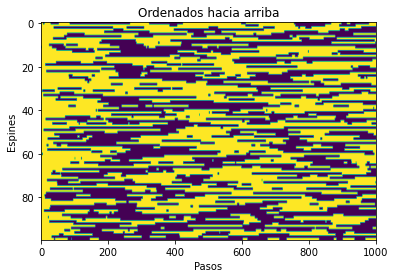

In [19]:
arregloEspArriba = np.random.rand(nEspines)
for i in range (nEspines):
    arregloEspArriba[i] = 0.5
    
plt.imshow(np.transpose(Ejecutar(arregloEspArriba,nPasos)),aspect = "auto")

plt.xlabel("Pasos")
plt.ylabel("Espines")
plt.title("Ordenados hacia arriba")

Se observa cómo la diferencia entre las gráficas de los espines hacia arriba y hacia abajo se observan gráficas relativamente invertidas, mientras que en la aleatoria no presenta tendencia. También se observan patrones similares.